In [170]:
# Import headers
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,5)

In [171]:
"""Parse JSON file and convert as CSV file. Cleaning JSON file 
and remove unwated elements and write into a CSV file"""

with open('railway_gauges.json') as json_data:
    data = json.load(json_data)

# Write Headers    
field_header = []    
for fields in data['fields']:
    field_header.append(fields['label'])

# Write Rows
with open('railway_gauges.csv', 'w') as infile:
    writer = csv.DictWriter(infile, fieldnames=field_header)
    writer.writeheader()
    
    for values in data['data']:
        writer.writerow({field_header[0]:values[0],field_header[1]:int(values[1]),field_header[2]:int(values[2]),field_header[3]:int(values[3]),
                        field_header[4]:int(values[4])})
        
    


      

In [172]:
# Load CSV file
df = pd.read_csv('railway_gauges.csv')
df.head()

,Year,Broad Gauge,Metre Gauge,Narrow Gauge,Total
0,1964-65,3521,2891,464,6876
1,1965-66,3603,2913,470,6986
2,1966-67,3615,2911,481,7007
3,1967-68,3601,2920,506,7027
4,1968-69,3603,2921,508,7032


In [173]:
# Find max of 'Broad Gauge'
df.iloc[[df['Broad Gauge'].idxmax()]]

,Year,Broad Gauge,Metre Gauge,Narrow Gauge,Total
48,2012-13,6577,379,216,7172


In [174]:
# Find max of 'Metre Gauge'
df.iloc[[df['Metre Gauge'].idxmax()]]

,Year,Broad Gauge,Metre Gauge,Narrow Gauge,Total
4,1968-69,3603,2921,508,7032


In [175]:
# Find max of 'Narrow Gauge'
df.iloc[[df['Narrow Gauge'].idxmax()]]

,Year,Broad Gauge,Metre Gauge,Narrow Gauge,Total
4,1968-69,3603,2921,508,7032


In [176]:
# Find which year had the maximum installations
df.iloc[[df['Total'].idxmax()]]

,Year,Broad Gauge,Metre Gauge,Narrow Gauge,Total
48,2012-13,6577,379,216,7172


In [177]:
# Dataframe to describe Min, Max, Mean, STD
df.describe()

,Broad Gauge,Metre Gauge,Narrow Gauge,Total
count,49.000000,49.000000,49.000000,49.000000
mean,4572.775510,2077.510204,386.795918,7037.081633
std,946.656887,847.318863,106.809991,73.805724
min,3521.000000,379.000000,191.000000,6853.000000
25%,3767.000000,1318.000000,284.000000,7017.000000
50%,4163.000000,2478.000000,442.000000,7056.000000
75%,5261.000000,2786.000000,468.000000,7084.000000
max,6577.000000,2921.000000,508.000000,7172.000000


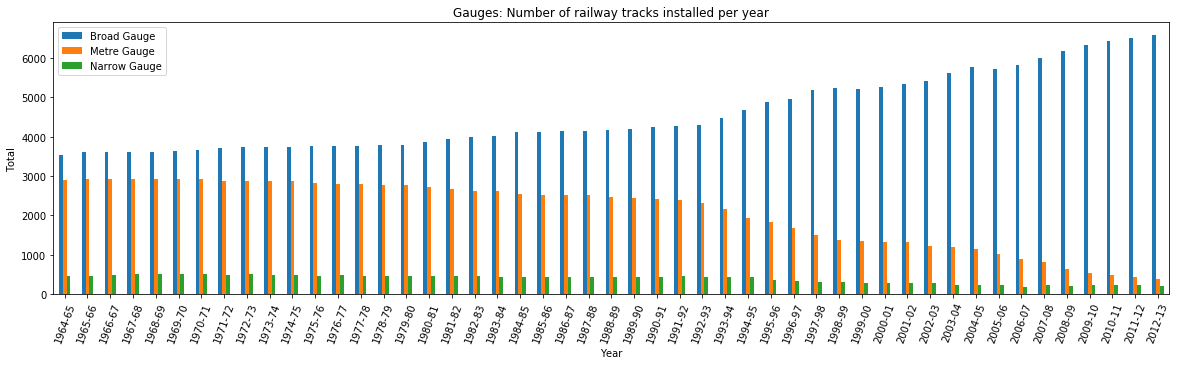

In [178]:
df = df.drop('Total', axis=1)
ax = df.plot(x="Year", kind="bar")
plt.xticks(rotation=70)
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Gauges: Number of railway tracks installed per year')
plt.savefig('rail_gauges.png')
plt.show()